In [1]:
import urllib3
from bs4 import BeautifulSoup
import nltk

In [2]:
#Get the content of a url
http = urllib3.PoolManager()
url = 'https://www.gutenberg.org/files/60656/60656-0.txt'
response = http.request('Get', url)
print(response)

In [3]:
htmlContent = BeautifulSoup(response.data,'html.parser')
htmlContent

The Project Gutenberg EBook of La guerre des mondes, by H. G.  Wells

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org/license


Title: La guerre des mondes

Author: H. G.  Wells

Illustrator: Alvim Corrêa

Translator: Henry-D Davray

Release Date: November 9, 2019 [EBook #60656]

Language: French

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK LA GUERRE DES MONDES ***




Produced by Claudine Corbasson, Chuck Greif and the Online
Distributed Proofreading Team at http://www.pgdp.net (This
file was produced from images generously made available
by The Internet Archive/American Libraries.)









                         LA GUERRE DES MONDES




                             H.-G. Wells.

                               La Guerre
                              des Mo

In [4]:
#Get text only
htmlContent2 = htmlContent.get_text()
htmlContent2

'The Project Gutenberg EBook of La guerre des mondes, by H. G.  Wells\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org/license\r\n\r\n\r\nTitle: La guerre des mondes\r\n\r\nAuthor: H. G.  Wells\r\n\r\nIllustrator: Alvim Corrêa\r\n\r\nTranslator: Henry-D Davray\r\n\r\nRelease Date: November 9, 2019 [EBook #60656]\r\n\r\nLanguage: French\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK LA GUERRE DES MONDES ***\r\n\r\n\r\n\r\n\r\nProduced by Claudine Corbasson, Chuck Greif and the Online\r\nDistributed Proofreading Team at http://www.pgdp.net (This\r\nfile was produced from images generously made available\r\nby The Internet Archive/American Libraries.)\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n                         LA GUERRE DES MONDES\r\n

In [5]:
#kill all script and style elements
for script in htmlContent(["script","style"]):
  script.decompose() #rip it out

In [6]:
htmlContent2 = htmlContent.get_text()

In [7]:
tokens = htmlContent2.split()
print(tokens[0:100])

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'La', 'guerre', 'des', 'mondes,', 'by', 'H.', 'G.', 'Wells', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'You', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org/license', 'Title:', 'La', 'guerre', 'des', 'mondes', 'Author:', 'H.', 'G.', 'Wells', 'Illustrator:', 'Alvim', 'Corrêa', 'Translator:', 'Henry-D', 'Davray', 'Release', 'Date:', 'November', '9,', '2019', '[EBook', '#60656]', 'Language:', 'French', 'Character', 'set', 'encoding:', 'UTF-8', '***', 'START', 'OF', 'THIS', 'PROJECT', 'GUTENBERG', 'EBOOK', 'LA', 'GUERRE', 'DES', 'MONDES', '***', 'Produced', 'by', 'Claudine']


In [8]:
import operator
freq_dis = {}
for tok in tokens:
  if tok in freq_dis:
    freq_dis[tok] += 1
  else:
    freq_dis[tok] = 1

sorted_freq_dis = sorted(freq_dis.items(), key = operator.itemgetter(1), reverse = True)
sorted_freq_dis[0:10]


[('de', 3204),
 ('et', 2133),
 ('la', 1759),
 ('le', 1272),
 ('les', 1268),
 ('à', 1249),
 ('des', 938),
 ('un', 815),
 ('que', 736),
 ('une', 637)]

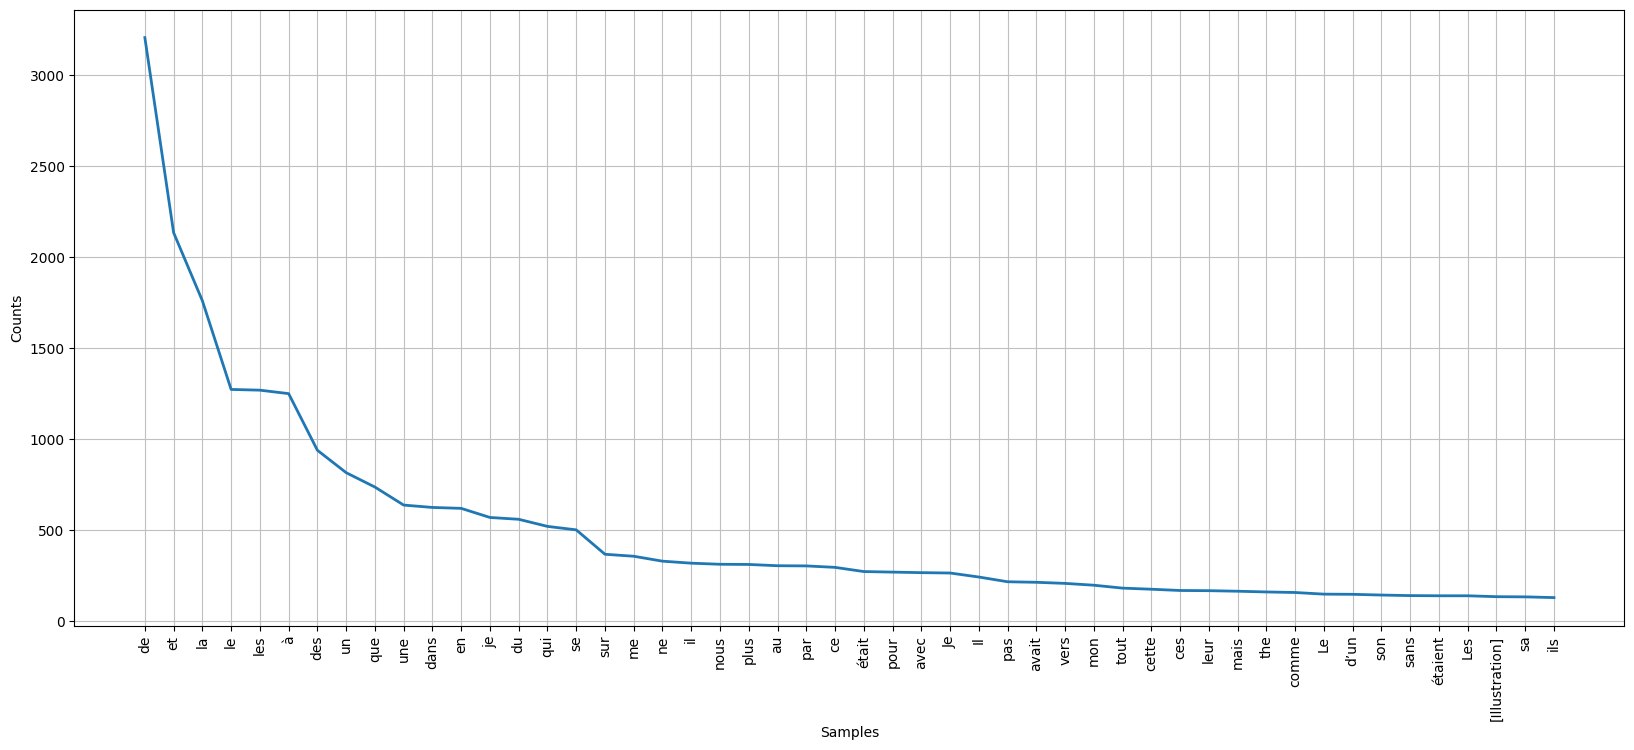

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
freq_dis_nltk = nltk.FreqDist(tokens)
freq_dis_nltk.plot(50, cumulative = False)

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
#french
stopwords = nltk.corpus.stopwords.words('french')

In [12]:
#english
stopwords2 = nltk.corpus.stopwords.words('english')

In [13]:
clean_tokens = [tok for tok in tokens if len(tok.lower()) > 1 and (tok.lower() not in stopwords) and (tok.lower() not in stopwords2) ]

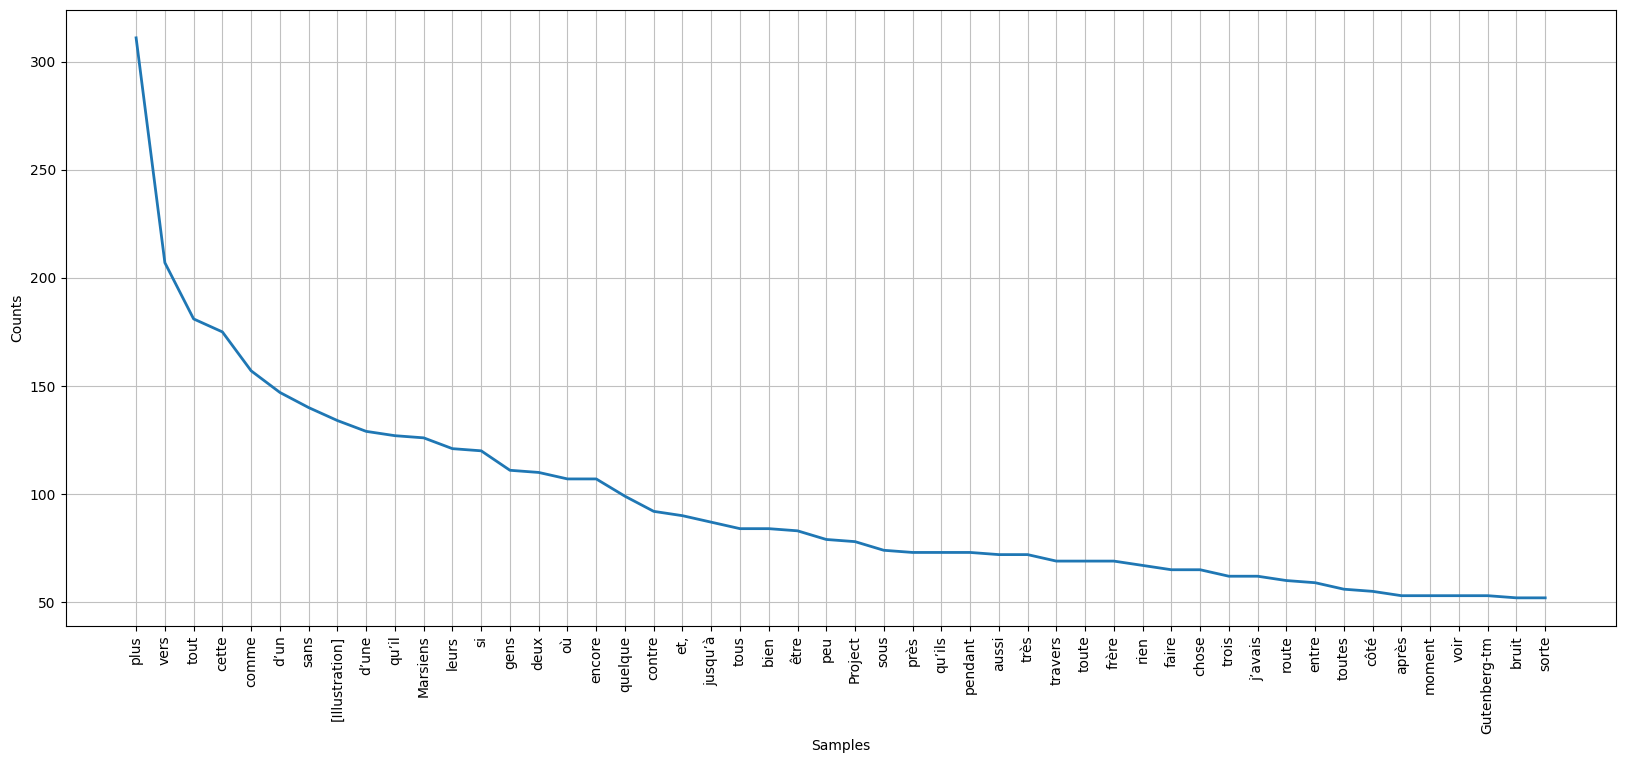

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
freq_dis_nltk = nltk.FreqDist(clean_tokens)
freq_dis_nltk.plot(50, cumulative = False)

In [15]:
from wordcloud import WordCloud

In [16]:
wc = WordCloud().generate_from_frequencies(freq_dis_nltk)

(-0.5, 399.5, 199.5, -0.5)

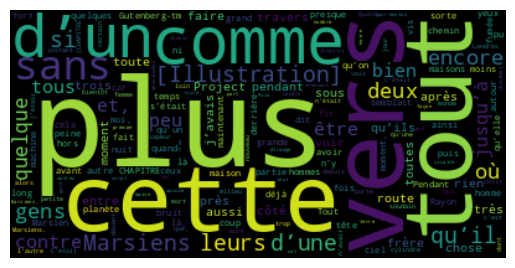

In [17]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')